In [0]:
from fastai import *
from fastai.vision import *
from fastai.callbacks.hooks import *

import numpy as np
import pandas as pd
from pathlib import Path
from fastai import *
from fastai.vision import *
import torch

%matplotlib inline
import matplotlib.pyplot as plt

from concurrent.futures import ThreadPoolExecutor
import cv2
import shutil
import fastai
print(f'fastai: {fastai.__version__}')
print(f'cuda: {torch.cuda.is_available()}')

fastai: 1.0.59
cuda: True


In [0]:
!pip install sentinelsat

In [0]:
!pip install sentinelsat
!pip install rasterio
!pip install folium
!apt install gdal-bin python-gdal python3-gdal 
!apt install python3-rtree 
!pip install git+git://github.com/geopandas/geopandas.git
!pip install descartes

     |████████████████████████████████| 15.2MB 901kB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources
Suggested packages:
  python3-setuptools
The following NEW packages will be installed:
  libspatialindex-c4

In [0]:
import folium
import os
import numpy as np

from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt 
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from shapely.geometry import MultiPolygon, Polygon
import rasterio as rio
from rasterio.plot import show
import rasterio.mask
import fiona

In [0]:
!pip install rasterio
!pip install geopandas
!pip install descartes
!pip install solaris
!pip install rio-tiler

     |████████████████████████████████| 8.5MB 7.0MB/s 
     |████████████████████████████████| 61kB 9.5MB/s 
     |████████████████████████████████| 3.2MB 58.2MB/s 
     |████████████████████████████████| 92.5MB 103kB/s 
     |████████████████████████████████| 266kB 59.5MB/s 
     |████████████████████████████████| 26.6MB 1.2MB/s 
     |████████████████████████████████| 61kB 8.5MB/s 
     |████████████████████████████████| 634kB 69.6MB/s 
     |████████████████████████████████| 3.2MB 49.8MB/s 
     |████████████████████████████████| 368kB 73.0MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.3-cp36-none-any.whl size=60764 sha256=3cefaf70247e26701e2c7f9083ca00177a09e479205a46cfaec4f78f0ed977b8
  Stored in directory: /root/.cache/pip/wheels/20/16/8e/d3bec34bf30adff30929226f0b83cc8c005b5af131f51db9d0
  Created wheel for pyyaml: filename=PyYAML-5.1.2-cp36-cp36m-linux_x86_64.whl size=44104 sha256=9adb6ebe136bdf88652f45b1f5c7050223e3c67488a4ddc4c61fe625aa0b793e
  Stored i

     |████████████████████████████████| 112kB 9.8MB/s 
  Created wheel for rio-tiler: filename=rio_tiler-1.3.1-cp36-none-any.whl size=172294 sha256=fb2aacf0becbbc2169219a567ada4dc144115547466628b17bd3776d1ccff387
  Stored in directory: /root/.cache/pip/wheels/13/0f/f0/2e7e21b2aeaa99791322cdd28262bbf3da097d24a4bf640f47
  Created wheel for rio-toa: filename=rio_toa-0.3.0-cp36-none-any.whl size=12429 sha256=131794063912501ab7985a2dd1a6b034224954734b25f0bec81ba585c616bf28
  Stored in directory: /root/.cache/pip/wheels/12/25/52/036fe06fa14768bf5e4eef4abd4beccb3924b695199f1721a2
Successfully built rio-tiler rio-toa


In [0]:
import solaris as sol
import numpy as np
import geopandas as gpd
from matplotlib import pyplot as plt
from pathlib import Path
import rasterio
import os

data_dir = Path('data')
data_dir.mkdir(exist_ok=True)

img_path = data_dir/'images-256'
mask_path = data_dir/'masks-256'
img_path.mkdir(exist_ok=True)
mask_path.mkdir(exist_ok=True)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [0]:
tif_url = 'http://oin-hotosm.s3.amazonaws.com/5afeda152b6a08001185f11a/0/5afeda152b6a08001185f11b.tif'
geojson_url = 'https://www.dropbox.com/sh/ct3s1x2a846x3yl/AAARCAOqhcRdoU7ULOb9GJl9a/grid_001.geojson?dl=1'

In [0]:
rasterio.open(tif_url).meta

{'count': 3,
 'crs': CRS.from_epsg(32737),
 'driver': 'GTiff',
 'dtype': 'uint8',
 'height': 34306,
 'nodata': None,
 'transform': Affine(0.0774800032377243, 0.0, 531847.0,
       0.0, -0.0774800032377243, 9367848.0),
 'width': 37113}

In [0]:
!wget -O tmp.tif {tif_url}

--2019-12-01 04:11:16--  http://oin-hotosm.s3.amazonaws.com/5afeda152b6a08001185f11a/0/5afeda152b6a08001185f11b.tif
Resolving oin-hotosm.s3.amazonaws.com (oin-hotosm.s3.amazonaws.com)... 52.216.169.211
Connecting to oin-hotosm.s3.amazonaws.com (oin-hotosm.s3.amazonaws.com)|52.216.169.211|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 204496818 (195M) [image/tiff]
Saving to: ‘tmp.tif’

tmp.tif             100%[===================>] 195.02M  35.9MB/s    in 6.0s    

2019-12-01 04:11:23 (32.5 MB/s) - ‘tmp.tif’ saved [204496818/204496818]



In [0]:
rasterio.open('tmp.tif').meta

{'count': 3,
 'crs': CRS.from_epsg(32737),
 'driver': 'GTiff',
 'dtype': 'uint8',
 'height': 34306,
 'nodata': None,
 'transform': Affine(0.0774800032377243, 0.0, 531847.0,
       0.0, -0.0774800032377243, 9367848.0),
 'width': 37113}

In [0]:
# load geojson for znz001 labels

label_df = gpd.read_file(geojson_url)
label_df = label_df[label_df['geometry'].isna() != True] # remove empty rows

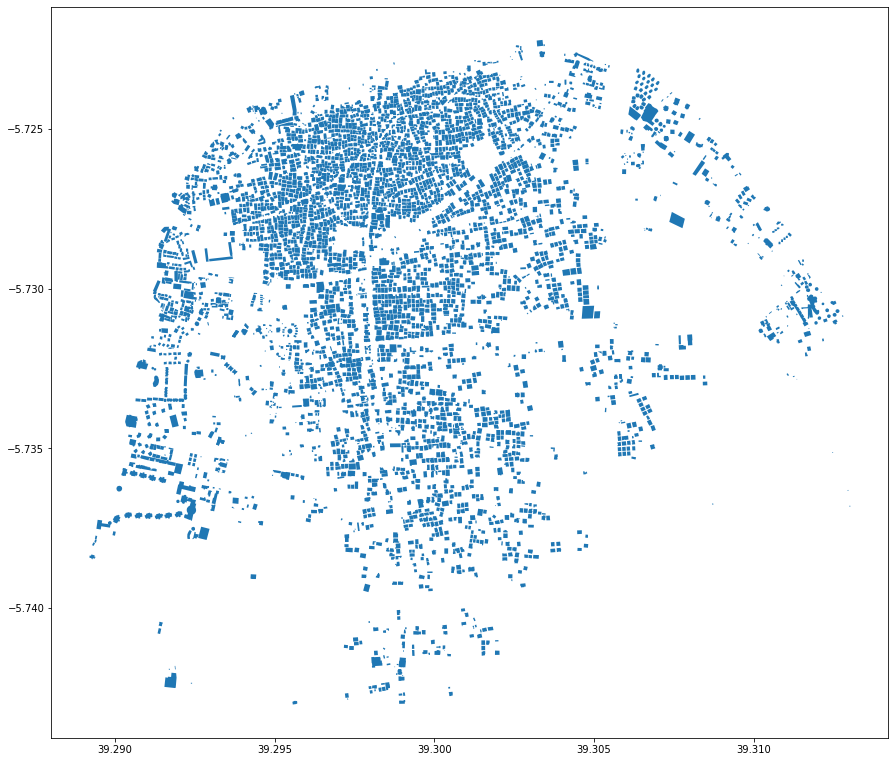

In [0]:
label_df.plot(figsize=(15,15))

In [0]:
tile_size = 256
zoom_level = 19

In [0]:
# download pre-made AOI geojson file:
!wget -O aoi.geojson https://www.dropbox.com/s/ojyjvvoer5guadr/znz001_trnval2.geojson?dl=1

--2019-12-01 04:11:29--  https://www.dropbox.com/s/ojyjvvoer5guadr/znz001_trnval2.geojson?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/ojyjvvoer5guadr/znz001_trnval2.geojson [following]
--2019-12-01 04:11:29--  https://www.dropbox.com/s/dl/ojyjvvoer5guadr/znz001_trnval2.geojson
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4eddb673e014ee5eb33a6feced.dl.dropboxusercontent.com/cd/0/get/AtZpwZO2OBOd9g5EkLcfo_OuULlxCJEDZBukSzm6vUA-NDVwmwka_ucYkPVciVuUwvt50mdA17urDYprueLAwXNJgumaR_IDXfr0jrTGcOeoIg/file?dl=1# [following]
--2019-12-01 04:11:29--  https://uc4eddb673e014ee5eb33a6feced.dl.dropboxusercontent.com/cd/0/get/AtZpwZO2OBOd9g5EkLcfo_OuULlxCJEDZBukSzm6vUA-NDVwmwka_ucYkPVciVuUwvt50mdA17urDYprueLAwXNJgumaR_IDXfr0

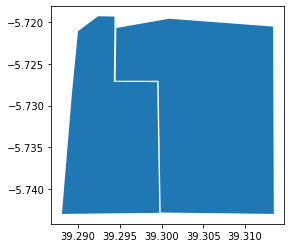

In [0]:
aoi_df = gpd.read_file('aoi.geojson')
aoi_df.plot()

In [0]:
aoi_df[aoi_df['dataset']=='trn']['geometry'].to_file('trn_aoi.geojson', driver='GeoJSON')
aoi_df[aoi_df['dataset']=='val']['geometry'].to_file('val_aoi.geojson', driver='GeoJSON')

In [0]:
# see https://github.com/mapbox/supermercado#supermercado-burn
!cat trn_aoi.geojson | supermercado burn {zoom_level} | mercantile shapes | fio collect > trn_aoi_z{zoom_level}tiles.geojson
!cat val_aoi.geojson | supermercado burn {zoom_level} | mercantile shapes | fio collect > val_aoi_z{zoom_level}tiles.geojson

In [0]:
trn_tiles = gpd.read_file(f'trn_aoi_z{zoom_level}tiles.geojson')
val_tiles = gpd.read_file(f'val_aoi_z{zoom_level}tiles.geojson')
trn_tiles['dataset'] = 'trn'
val_tiles['dataset'] = 'val'

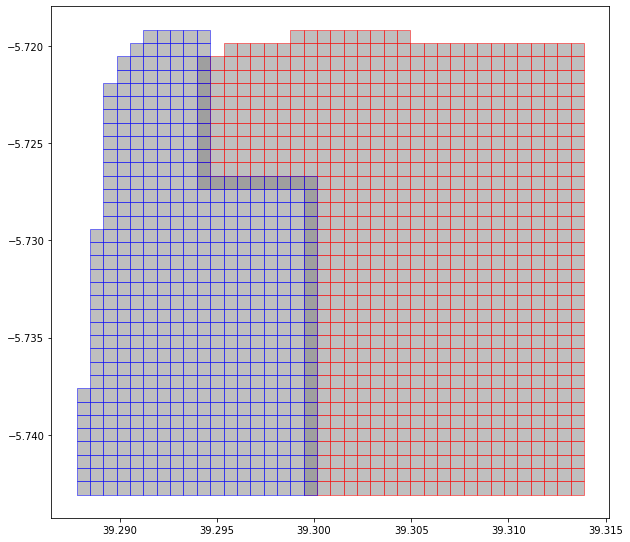

In [0]:
# see if there's overlapping tiles between trn and val
fig, ax = plt.subplots(figsize=(10,10))
trn_tiles.plot(ax=ax, color='grey', alpha=0.5, edgecolor='red')
val_tiles.plot(ax=ax, color='grey', alpha=0.5, edgecolor='blue')

In [0]:
# merge into one gdf to keep all trn tiles while dropping overlapping/duplicate val tiles
import pandas as pd
tiles_gdf = gpd.GeoDataFrame(pd.concat([trn_tiles, val_tiles], ignore_index=True), crs=trn_tiles.crs)
tiles_gdf.drop_duplicates(subset=['id'], inplace=True)

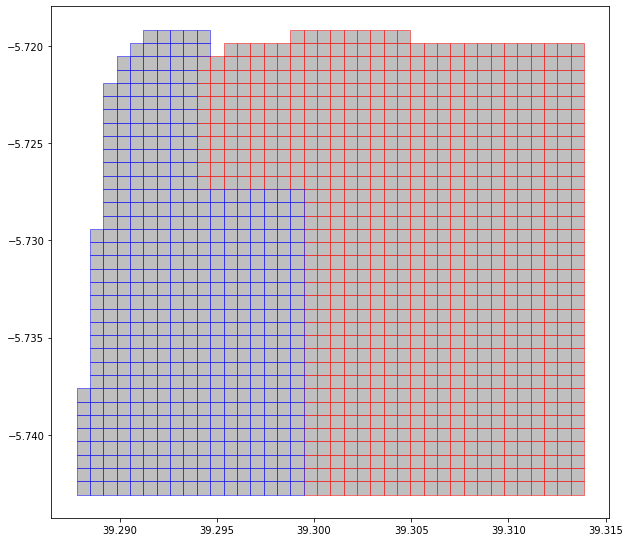

In [0]:
# check that there's no more overlapping tiles between trn and val
fig, ax = plt.subplots(figsize=(10,10))
tiles_gdf[tiles_gdf['dataset'] == 'trn'].plot(ax=ax, color='grey', edgecolor='red', alpha=0.5)
tiles_gdf[tiles_gdf['dataset'] == 'val'].plot(ax=ax, color='grey', edgecolor='blue', alpha=0.5)

In [0]:
tiles_gdf.head(n=10)

id  ... dataset
0  (319377, 270487, 19)  ...     trn
1  (319378, 270487, 19)  ...     trn
2  (319379, 270487, 19)  ...     trn
3  (319380, 270487, 19)  ...     trn
4  (319381, 270487, 19)  ...     trn
5  (319382, 270487, 19)  ...     trn
6  (319383, 270487, 19)  ...     trn
7  (319384, 270487, 19)  ...     trn
8  (319385, 270487, 19)  ...     trn
9  (319372, 270488, 19)  ...     trn

[10 rows x 4 columns]

In [0]:
# convert 'id' string to list of ints for z,x,y

def reformat_xyz(tile_gdf):
  tile_gdf['xyz'] = tile_gdf.id.apply(lambda x: x.lstrip('(,)').rstrip('(,)').split(','))
  tile_gdf['xyz'] = [[int(q) for q in p] for p in tile_gdf['xyz']]
  return tile_gdf

In [0]:
tiles_gdf = reformat_xyz(tiles_gdf)
tiles_gdf.head(n=10)

id  ...                   xyz
0  (319377, 270487, 19)  ...  [319377, 270487, 19]
1  (319378, 270487, 19)  ...  [319378, 270487, 19]
2  (319379, 270487, 19)  ...  [319379, 270487, 19]
3  (319380, 270487, 19)  ...  [319380, 270487, 19]
4  (319381, 270487, 19)  ...  [319381, 270487, 19]
5  (319382, 270487, 19)  ...  [319382, 270487, 19]
6  (319383, 270487, 19)  ...  [319383, 270487, 19]
7  (319384, 270487, 19)  ...  [319384, 270487, 19]
8  (319385, 270487, 19)  ...  [319385, 270487, 19]
9  (319372, 270488, 19)  ...  [319372, 270488, 19]

[10 rows x 5 columns]

In [0]:
from rio_tiler import main as rt_main

# import mercantile
from rasterio.transform import from_bounds
from shapely.geometry import Polygon
from shapely.ops import cascaded_union

In [0]:
idx = 240
tiles_gdf.iloc[idx]['xyz']

[319371, 270496, 19]

In [0]:
tile, mask = rt_main.tile(tif_url, *tiles_gdf.iloc[idx]['xyz'], tilesize=tile_size)

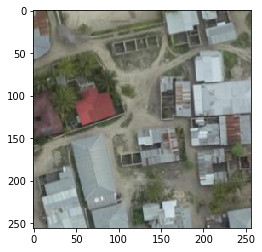

In [0]:
plt.imshow(np.moveaxis(tile,0,2))

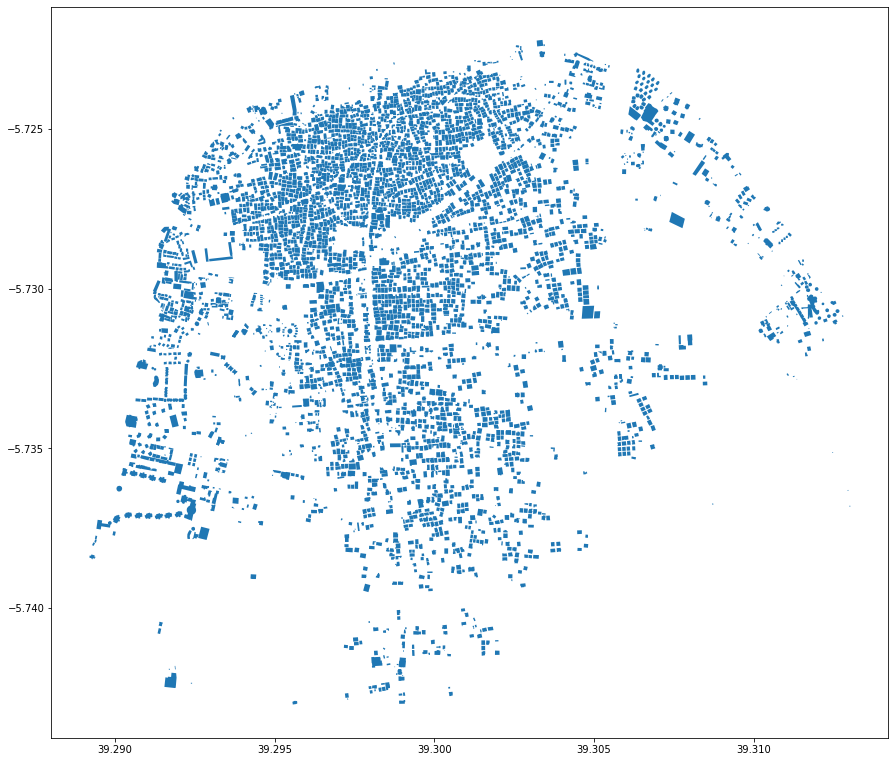

In [0]:
# redisplay our labeled geojson file
label_df.plot(figsize=(15,15))

In [0]:
# get the geometries from the geodataframe
all_polys = label_df.geometry

In [0]:
# preemptively fix and merge any invalid or overlapping geoms that would otherwise throw errors during the rasterize step. 
# TODO: probably a better way to do this

# https://gis.stackexchange.com/questions/271733/geopandas-dissolve-overlapping-polygons
# https://nbviewer.jupyter.org/gist/rutgerhofste/6e7c6569616c2550568b9ce9cb4716a3

def explode(gdf):
    """    
    Will explode the geodataframe's muti-part geometries into single 
    geometries. Each row containing a multi-part geometry will be split into
    multiple rows with single geometries, thereby increasing the vertical size
    of the geodataframe. The index of the input geodataframe is no longer
    unique and is replaced with a multi-index. 

    The output geodataframe has an index based on two columns (multi-index) 
    i.e. 'level_0' (index of input geodataframe) and 'level_1' which is a new
    zero-based index for each single part geometry per multi-part geometry
    
    Args:
        gdf (gpd.GeoDataFrame) : input geodataframe with multi-geometries
        
    Returns:
        gdf (gpd.GeoDataFrame) : exploded geodataframe with each single 
                                 geometry as a separate entry in the 
                                 geodataframe. The GeoDataFrame has a multi-
                                 index set to columns level_0 and level_1
        
    """
    gs = gdf.explode()
    gdf2 = gs.reset_index().rename(columns={0: 'geometry'})
    gdf_out = gdf2.merge(gdf.drop('geometry', axis=1), left_on='level_0', right_index=True)
    gdf_out = gdf_out.set_index(['level_0', 'level_1']).set_geometry('geometry')
    gdf_out.crs = gdf.crs
    return gdf_out

def cleanup_invalid_geoms(all_polys):
  all_polys_merged = gpd.GeoDataFrame()
  all_polys_merged['geometry'] = gpd.GeoSeries(cascaded_union([p.buffer(0) for p in all_polys]))

  gdf_out = explode(all_polys_merged)
  gdf_out = gdf_out.reset_index()
  gdf_out.drop(columns=['level_0','level_1'], inplace=True)
  all_polys = gdf_out['geometry']
  return all_polys

all_polys = cleanup_invalid_geoms(all_polys)

(39.29466247558594, -5.725994667444731, 39.29534912109375, -5.7253114476101485)


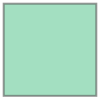

In [0]:
# get the same tile polygon as our tile image above
tile_poly = tiles_gdf.iloc[idx]['geometry']
print(tile_poly.bounds)
tile_poly

In [0]:
# get affine transformation matrix for this tile using rasterio.transform.from_bounds: https://rasterio.readthedocs.io/en/stable/api/rasterio.transform.html#rasterio.transform.from_bounds
tfm = from_bounds(*tile_poly.bounds, tile_size, tile_size) 
tfm

Affine(2.682209014892578e-06, 0.0, 39.29466247558594,
       0.0, -2.668827478836261e-06, -5.7253114476101485)

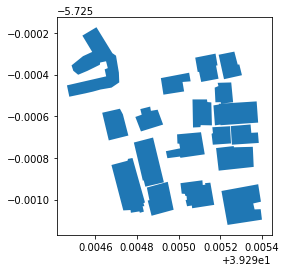

In [0]:
# crop znz001 geometries to what overlaps our tile polygon bounds
cropped_polys = [poly for poly in all_polys if poly.intersects(tile_poly)]
cropped_polys_gdf = gpd.GeoDataFrame(geometry=cropped_polys, crs={'init': 'epsg:4326'})
cropped_polys_gdf.plot()

In [0]:
# burn a footprint/boundary/contact 3-channel mask with solaris: https://solaris.readthedocs.io/en/latest/tutorials/notebooks/api_masks_tutorial.html

fbc_mask = sol.vector.mask.df_to_px_mask(df=cropped_polys_gdf,
                                         channels=['footprint', 'boundary', 'contact'],
                                         affine_obj=tfm, shape=(tile_size,tile_size),
                                         boundary_width=5, boundary_type='inner', contact_spacing=5, meters=True)

/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


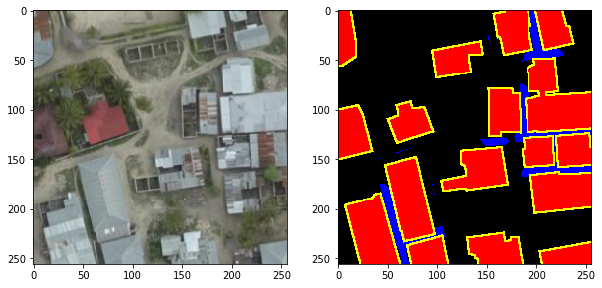

In [0]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10, 5))
ax1.imshow(np.moveaxis(tile,0,2))
ax2.imshow(fbc_mask)

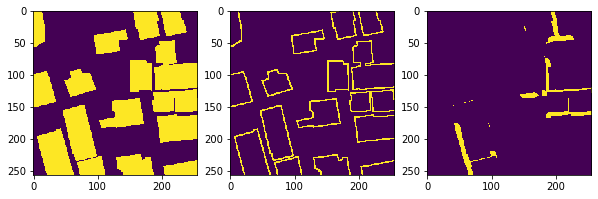

In [0]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(10, 5))
ax1.imshow(fbc_mask[:,:,0])
ax2.imshow(fbc_mask[:,:,1])
ax3.imshow(fbc_mask[:,:,2])

In [0]:
import skimage
from tqdm import tqdm

In [0]:
def save_tile_img(tif_url, xyz, tile_size, save_path='', prefix='', display=False):
  x,y,z = xyz
  tile, mask = rt_main.tile(tif_url, x,y,z, tilesize=tile_size)
  if display: 
    plt.imshow(np.moveaxis(tile,0,2))
    plt.show()
    
  skimage.io.imsave(f'{save_path}/{prefix}{z}_{x}_{y}.png',np.moveaxis(tile,0,2), check_contrast=False) 

In [0]:
def save_tile_mask(labels_poly, tile_poly, xyz, tile_size, save_path='', prefix='', display=False):
  x,y,z = xyz
  tfm = from_bounds(*tile_poly.bounds, tile_size, tile_size) 
  
  cropped_polys = [poly for poly in labels_poly if poly.intersects(tile_poly)]
  cropped_polys_gdf = gpd.GeoDataFrame(geometry=cropped_polys, crs={'init': 'epsg:4326'})
  
  fbc_mask = sol.vector.mask.df_to_px_mask(df=cropped_polys_gdf,
                                         channels=['footprint', 'boundary', 'contact'],
                                         affine_obj=tfm, shape=(tile_size,tile_size),
                                         boundary_width=5, boundary_type='inner', contact_spacing=5, meters=True)
  
  if display: plt.imshow(fbc_mask); plt.show()
  
  skimage.io.imsave(f'{save_path}/{prefix}{z}_{x}_{y}_mask.png',fbc_mask, check_contrast=False) 

In [0]:
tiles_gdf[tiles_gdf['dataset'] == 'trn'].shape, tiles_gdf[tiles_gdf['dataset'] == 'val'].shape

((809, 5), (452, 5))

In [0]:
# we'll load our COG locally but could also load directly from url which is slower and subject to potentially more i/o issues
# TODO: try loading from url and catch i/o exceptions
# TODO: multithread/multiprocess this? Took ~3.5 mins to load and save 1261 image tiles on local COG file loading
for idx, tile in tqdm(tiles_gdf.iterrows()):
  dataset = tile['dataset']
  save_tile_img('tmp.tif', tile['xyz'], tile_size, save_path=img_path, prefix=f'znz001{dataset}_', display=False)

1261it [01:59, 14.63it/s]


In [0]:
# TODO: multiprocess this? Took ~3 mins to burn and save 1261 masks
for idx, tile in tqdm(tiles_gdf.iterrows()):
  dataset = tile['dataset']
  tile_poly = tile['geometry']
  save_tile_mask(all_polys, tile_poly, tile['xyz'], tile_size, save_path=mask_path,prefix=f'znz001{dataset}_', display=False)

102it [00:02, 39.76it/s]/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
107it [00:02, 25.31it/s]/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
129it [00:03, 31.75it/s]/usr/loc

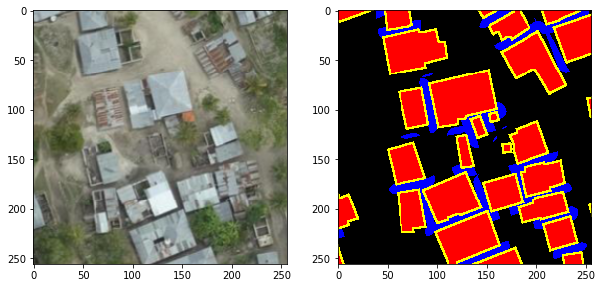

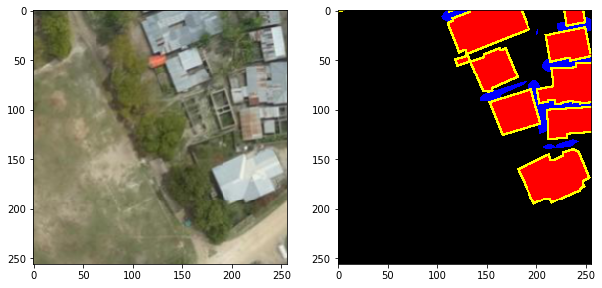

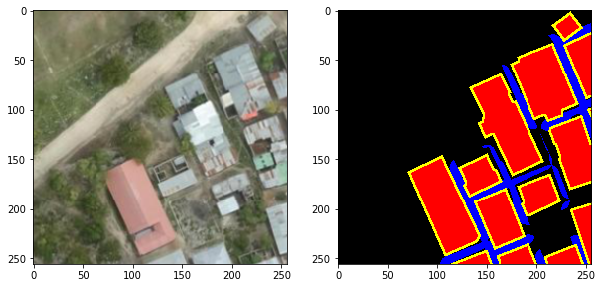

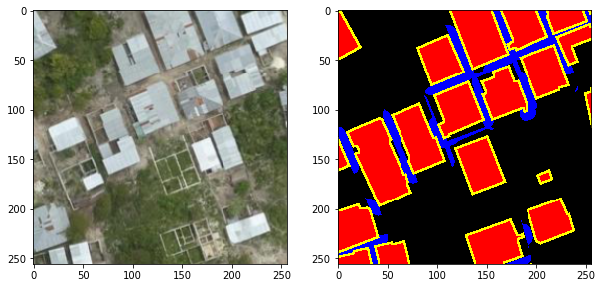

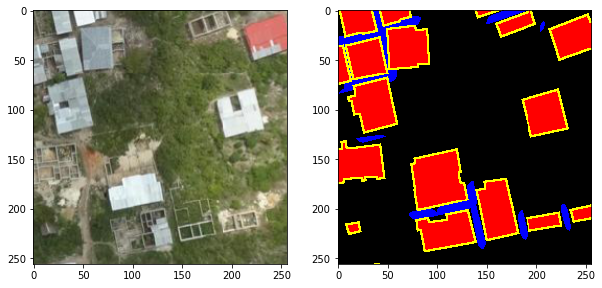

In [0]:
# check that tile images and masks saved correctly
start_idx, end_idx = 200,205
for i,j in zip(sorted(img_path.iterdir())[start_idx:end_idx], sorted(mask_path.iterdir())[start_idx:end_idx]):
  fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
  ax1.imshow(skimage.io.imread(i))
  ax2.imshow(skimage.io.imread(j))
  plt.show()

In [0]:
# compress and download
!tar -czf znz001trn.tar.gz data

In [0]:
# to mount and transfer to GDrive: uncomment and run this and the next cell, follow instructions to auhorize access to your GDrive

# from google.colab import drive
# drive.mount('/content/drive')

In [0]:
# copy training data compressed tarball to root of your GDrive
# !cp znz001trn.tar.gz /content/drive/My\ Drive/ 

In [0]:
!curl https://course.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   322  100   322    0     0    858      0 --:--:-- --:--:-- --:--:--   856
ln: failed to create symbolic link '/content/data': File exists
Updating fastai...
Done.


In [0]:
from fastai.vision import *
from fastai.callbacks import *

In [0]:
from fastai.utils.collect_env import *
show_install(True)



```text
=== Software === 
python        : 3.6.8
fastai        : 1.0.59
fastprogress  : 0.1.21
torch         : 1.3.1
nvidia driver : 418.67
torch cuda    : 10.1.243 / is available
torch cudnn   : 7603 / is enabled

=== Hardware === 
nvidia gpus   : 1
torch devices : 1
  - gpu0      : 15079MB | Tesla T4

=== Environment === 
platform      : Linux-4.14.137+-x86_64-with-Ubuntu-18.04-bionic
distro        : #1 SMP Thu Aug 8 02:47:02 PDT 2019
conda env     : Unknown
python        : /usr/bin/python3
sys.path      : 
/env/python
/usr/lib/python36.zip
/usr/lib/python3.6
/usr/lib/python3.6/lib-dynload
/usr/local/lib/python3.6/dist-packages
/usr/lib/python3/dist-packages
/usr/local/lib/python3.6/dist-packages/IPython/extensions
/root/.ipython

Sun Dec  1 04:17:13 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.33.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+--------

In [0]:
# if not already present in file storage, download and extract the training/validation dataset created in above sections
!wget -O znz001trn.tar.gz https://www.dropbox.com/s/2a2ikf7m265davv/znz001trn.tar.gz?dl=1
!tar -xf znz001trn.tar.gz

--2019-12-01 04:17:15--  https://www.dropbox.com/s/2a2ikf7m265davv/znz001trn.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/2a2ikf7m265davv/znz001trn.tar.gz [following]
--2019-12-01 04:17:15--  https://www.dropbox.com/s/dl/2a2ikf7m265davv/znz001trn.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce48f3197b8a0dfce170c084237.dl.dropboxusercontent.com/cd/0/get/AtYCwcx6asQ8buiuYKbng5D32WL2ugohFgyjmK_f2IGdkW6nZoqyNjLlOog9-_mv4_j0fwtJcnEsmfAbBV47U2UtokRw3jcw6rMCsy-Yp2opMg/file?dl=1# [following]
--2019-12-01 04:17:15--  https://uce48f3197b8a0dfce170c084237.dl.dropboxusercontent.com/cd/0/get/AtYCwcx6asQ8buiuYKbng5D32WL2ugohFgyjmK_f2IGdkW6nZoqyNjLlOog9-_mv4_j0fwtJcnEsmfAbBV47U2UtokRw3jcw6rMCsy-Yp2opMg/file?dl

In [0]:
path = Path('data')
path.ls()

[PosixPath('data/masks-256'), PosixPath('data/images-256')]

In [0]:
path_lbl = path/'masks-256'
path_img = path/'images-256'

In [0]:
fnames = get_image_files(path_img)
lbl_names = get_image_files(path_lbl)
print(len(fnames), len(lbl_names))
fnames[:5], lbl_names[:3] 

1261 1261


([PosixPath('data/images-256/znz001trn_19_319385_270488.png'),
  PosixPath('data/images-256/znz001trn_19_319385_270515.png'),
  PosixPath('data/images-256/znz001trn_19_319397_270505.png'),
  PosixPath('data/images-256/znz001val_19_319373_270508.png'),
  PosixPath('data/images-256/znz001trn_19_319378_270496.png')],
 [PosixPath('data/masks-256/znz001trn_19_319370_270496_mask.png'),
  PosixPath('data/masks-256/znz001trn_19_319378_270520_mask.png'),
  PosixPath('data/masks-256/znz001trn_19_319386_270497_mask.png')])

In [0]:
get_y_fn = lambda x: path_lbl/f'{x.stem}_mask.png'

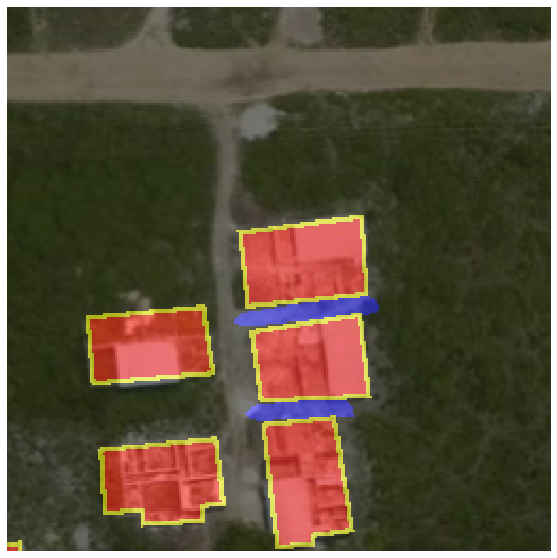

In [0]:
# test that masks are opening correctly with open_mask() settings
img_f = fnames[121]
img = open_image(img_f)
mask = open_mask(get_y_fn(img_f), convert_mode='RGB', div=False)

fig,ax = plt.subplots(1,1, figsize=(10,10))
img.show(ax=ax)
mask.show(ax=ax, alpha=0.5)

(array([183346.,      0.,  13262.]),
 array([  0.,  85., 170., 255.]),
 <a list of 3 Patch objects>)

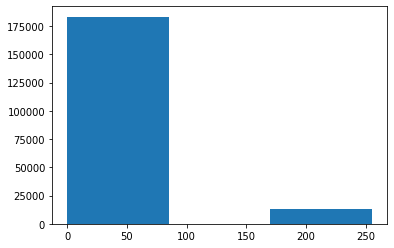

In [0]:

plt.hist(mask.data.view(-1), bins=3)

In [0]:
# define the valdation set by fn prefix
holdout_grids = ['znz001val_']
valid_idx = [i for i,o in enumerate(fnames) if any(c in str(o) for c in holdout_grids)]
print(len(valid_idx))

452


In [0]:
# subclassing SegmentationLabelList to set open_mask(fn, div=True, convert_mode='RGB') for 3 channel target masks

class SegLabelListCustom(SegmentationLabelList):
    def open(self, fn): return open_mask(fn, div=True, convert_mode='RGB')
    
class SegItemListCustom(SegmentationItemList):
    _label_cls = SegLabelListCustom

In [0]:
# the classes corresponding to each channel
codes = np.array(['Footprint','Boundary','Contact'])

In [0]:
size = 256
bs = 8

In [0]:
# define image transforms for data augmentation and create databunch. More about image tfms and data aug at https://docs.fast.ai/vision.transform.html 
tfms = get_transforms(flip_vert=True, max_warp=0.1, max_rotate=20, max_zoom=2, max_lighting=0.3)

src = (SegItemListCustom.from_folder(path_img)
        .split_by_idx(valid_idx)
        .label_from_func(get_y_fn, classes=codes))

data = (src.transform(tfms, size=size, tfm_y=True)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

In [0]:
def show_3ch(imgitem, figsize=(10,5)):
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=figsize)
    ax1.imshow(np.asarray(imgitem.data[0,None])[0])
    ax2.imshow(np.asarray(imgitem.data[1,None])[0])
    ax3.imshow(np.asarray(imgitem.data[2,None])[0])
    
    ax1.set_title('Footprint')
    ax2.set_title('Boundary')
    ax3.set_title('Contact')
    
    plt.show()

znz001val_19_319366_270494.png


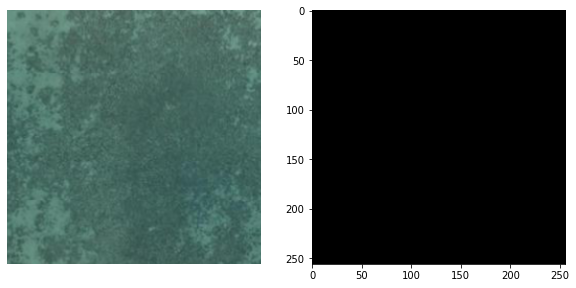

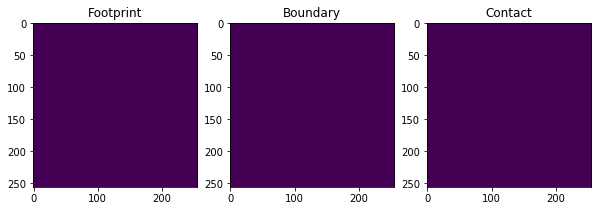

znz001val_19_319371_270509.png


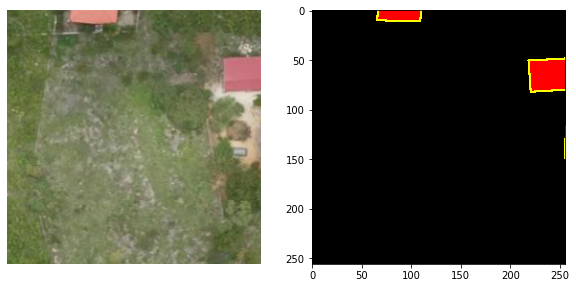

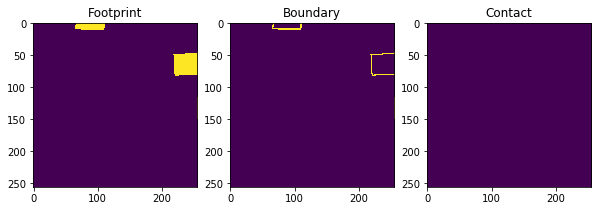

znz001val_19_319368_270509.png


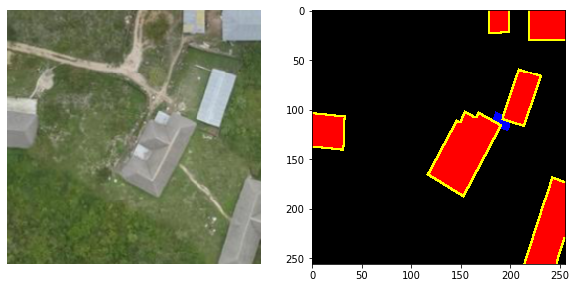

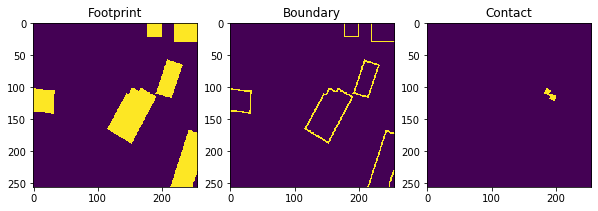

znz001val_19_319363_270491.png


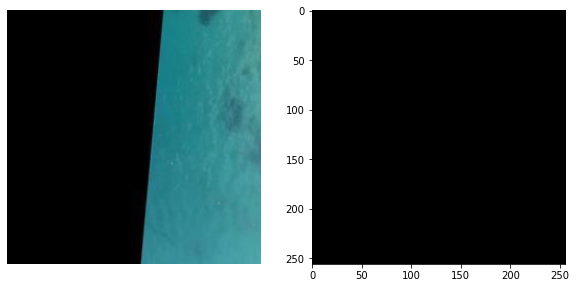

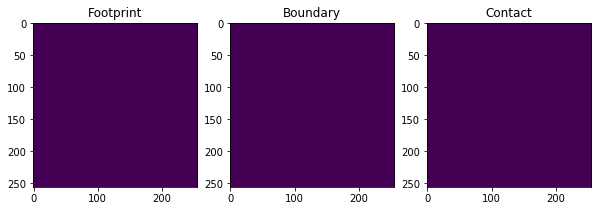

znz001val_19_319366_270508.png


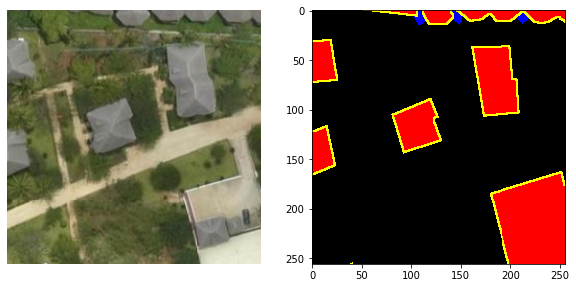

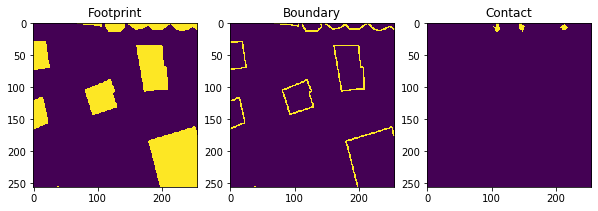

In [0]:
for idx in range(10,15):
    print(data.valid_ds.items[idx].name)
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
    data.valid_ds.x[idx].show(ax=ax1)
    ax2.imshow(image2np(data.valid_ds.y[idx].data*255))
    plt.show()
    show_3ch(data.valid_ds.y[idx])

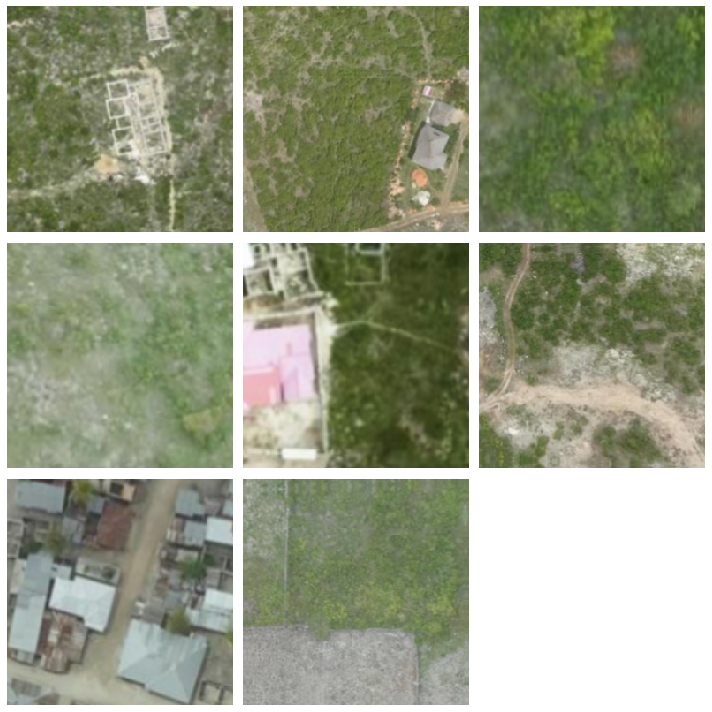

In [0]:
# visually inspect data-augmented training images
# TODO: show_batch doesn't display RGB mask correctly, setting alpha=0 to turn off for now
data.show_batch(4,figsize=(10,10), alpha=0.)

In [0]:
data

ImageDataBunch;

Train: LabelList (809 items)
x: SegItemListCustom
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: SegLabelListCustom
ImageSegment (3, 256, 256),ImageSegment (3, 256, 256),ImageSegment (3, 256, 256),ImageSegment (3, 256, 256),ImageSegment (3, 256, 256)
Path: data/images-256;

Valid: LabelList (452 items)
x: SegItemListCustom
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: SegLabelListCustom
ImageSegment (3, 256, 256),ImageSegment (3, 256, 256),ImageSegment (3, 256, 256),ImageSegment (3, 256, 256),ImageSegment (3, 256, 256)
Path: data/images-256;

Test: None

In [0]:
import pdb

def dice_loss(input, target):
#     pdb.set_trace()
    smooth = 1.
    input = torch.sigmoid(input)
    iflat = input.contiguous().view(-1).float()
    tflat = target.contiguous().view(-1).float()
    intersection = (iflat * tflat).sum()
    return 1 - ((2. * intersection + smooth) / ((iflat + tflat).sum() +smooth))

# adapted from https://www.kaggle.com/c/tgs-salt-identification-challenge/discussion/65938
class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2, reduction='mean'):
        super().__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        BCE_loss = F.binary_cross_entropy_with_logits(inputs, targets.float(), reduction='none')
        pt = torch.exp(-BCE_loss)
        F_loss = self.alpha * (1-pt)**self.gamma * BCE_loss

        if self.reduction == 'mean': return F_loss.mean()
        elif self.reduction == 'sum': return F_loss.sum()
        else: return F_loss

class DiceLoss(nn.Module):
    def __init__(self, reduction='mean'):
        super().__init__()
        self.reduction = reduction
        
    def forward(self, input, target):
        loss = dice_loss(input, target)
        if self.reduction == 'mean': return loss.mean()
        elif self.reduction == 'sum': return loss.sum()
        else: return loss

class MultiChComboLoss(nn.Module):
    def __init__(self, reduction='mean', loss_funcs=[FocalLoss(),DiceLoss()], loss_wts = [1,1], ch_wts=[1,1,1]):
        super().__init__()
        self.reduction = reduction
        self.ch_wts = ch_wts
        self.loss_wts = loss_wts
        self.loss_funcs = loss_funcs 
        
    def forward(self, output, target):
#         pdb.set_trace()
        for loss_func in self.loss_funcs: loss_func.reduction = self.reduction # need to change reduction on fwd pass for loss calc in learn.get_preds(with_loss=True)
        loss = 0
        channels = output.shape[1]
        assert len(self.ch_wts) == channels
        assert len(self.loss_wts) == len(self.loss_funcs)
        for ch_wt,c in zip(self.ch_wts,range(channels)):
            ch_loss=0
            for loss_wt, loss_func in zip(self.loss_wts,self.loss_funcs): 
                ch_loss+=loss_wt*loss_func(output[:,c,None], target[:,c,None])
            loss+=ch_wt*(ch_loss)
        return loss/sum(self.ch_wts)

In [0]:
# calculate metrics on one channel (i.e. ch 0 for building footprints only) or on all 3 channels

def acc_thresh_multich(input:Tensor, target:Tensor, thresh:float=0.5, sigmoid:bool=True, one_ch:int=None)->Rank0Tensor:
    "Compute accuracy when `y_pred` and `y_true` are the same size."
    
#     pdb.set_trace()
    if sigmoid: input = input.sigmoid()
    n = input.shape[0]
    
    if one_ch is not None:
        input = input[:,one_ch,None]
        target = target[:,one_ch,None]
    
    input = input.view(n,-1)
    target = target.view(n,-1)
    return ((input>thresh)==target.byte()).float().mean()

def dice_multich(input:Tensor, targs:Tensor, iou:bool=False, one_ch:int=None)->Rank0Tensor:
    "Dice coefficient metric for binary target. If iou=True, returns iou metric, classic for segmentation problems."
#     pdb.set_trace()
    n = targs.shape[0]
    input = input.sigmoid()
    
    if one_ch is not None:
        input = input[:,one_ch,None]
        targs = targs[:,one_ch,None]
    
    input = (input>0.5).view(n,-1).float()
    targs = targs.view(n,-1).float()

    intersect = (input * targs).sum().float()
    union = (input+targs).sum().float()
    if not iou: return (2. * intersect / union if union > 0 else union.new([1.]).squeeze())
    else: return intersect / (union-intersect+1.0)

In [0]:
# set up metrics to show mean metrics for all channels as well as the building-only metrics (channel 0)

acc_ch0 = partial(acc_thresh_multich, one_ch=0)
dice_ch0 = partial(dice_multich, one_ch=0)
metrics = [acc_thresh_multich, dice_multich, acc_ch0, dice_ch0]

In [0]:
# combo Focal + Dice loss with equal channel wts

learn = unet_learner(data, models.resnet34, model_dir='../../models',
                     metrics=metrics, 
                     loss_func=MultiChComboLoss(
                        reduction='mean',
                        loss_funcs=[FocalLoss(gamma=1, alpha=0.95),
                                    DiceLoss(),
                                   ], 
                        loss_wts=[1,1],
                        ch_wts=[1,1,1])
                    )

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:04<00:00, 21.0MB/s]


In [0]:
learn.metrics

[<function __main__.acc_thresh_multich>,
 <function __main__.dice_multich>,
 functools.partial(<function acc_thresh_multich at 0x7fe934b576a8>, one_ch=0),
 functools.partial(<function dice_multich at 0x7fe93746f730>, one_ch=0)]

In [0]:
learn.loss_func

MultiChComboLoss()

In [0]:
MultiChComboLoss()

MultiChComboLoss()

In [0]:
learn.summary()

DynamicUnet
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 128, 128]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 128, 128]       128        True      
______________________________________________________________________
ReLU                 [64, 128, 128]       0          False     
______________________________________________________________________
MaxPool2d            [64, 64, 64]         0          False     
______________________________________________________________________
Conv2d               [64, 64, 64]         36,864     False     
______________________________________________________________________
BatchNorm2d          [64, 64, 64]         128        True      
______________________________________________________________________
ReLU                 [64, 64, 64]         0          False     
__________________________________________________

In [0]:
lr = 1e-3
learn.fit_one_cycle(10, max_lr=lr, 
                    callbacks=[
                        SaveModelCallback(learn,
                                         monitor='dice_multich',
                                         mode='max',
                                         name='znz001trn-focaldice-stage1-best')
                    ]
                   )

Better model found at epoch 0 with dice_multich value: 0.6716232895851135.
Better model found at epoch 2 with dice_multich value: 0.8110564351081848.
Better model found at epoch 3 with dice_multich value: 0.8226035237312317.
Better model found at epoch 4 with dice_multich value: 0.8228980302810669.
Better model found at epoch 5 with dice_multich value: 0.8516608476638794.


In [0]:
learn.save("stage- 1")

In [0]:
learn.load("stage- 1");

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


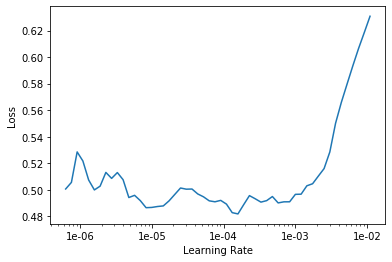

In [0]:
learn.recorder.plot()

In [0]:

learn.fit_one_cycle(20, max_lr=slice(5e-5, 5e-3), 
                    callbacks=[
                        SaveModelCallback(learn,
                                         monitor='dice_multich',
                                         mode='max',
                                         name='znz001trn-focaldice-stage2-best')
                    ]
                   )

Better model found at epoch 0 with dice_multich value: 0.83872389793396.
Better model found at epoch 9 with dice_multich value: 0.8398080468177795.
Better model found at epoch 10 with dice_multich value: 0.8422515988349915.
Better model found at epoch 13 with dice_multich value: 0.8464377522468567.
Better model found at epoch 15 with dice_multich value: 0.8483504056930542.
Better model found at epoch 16 with dice_multich value: 0.8563902378082275.


In [0]:
learn.model.eval()
outputs,labels,losses = learn.get_preds(ds_type=DatasetType.Valid,n_batch=3,with_loss=True)
losses.shape

torch.Size([24, 1, 256, 256])

In [0]:
losses_reshaped = torch.mean(losses.view(outputs.shape[0],-1), dim=1)
sorted_idx = torch.argsort(losses_reshaped,descending=True)
losses_reshaped.shape

torch.Size([24])

znz001val_19_319367_270501.png
loss: 0.6856135725975037


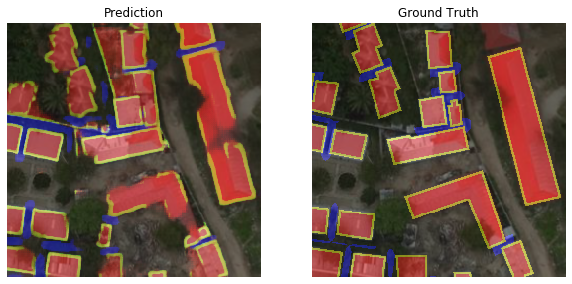

Predicted:


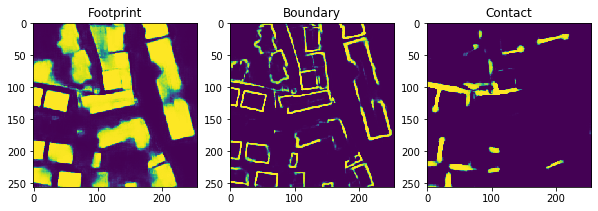

Actual:


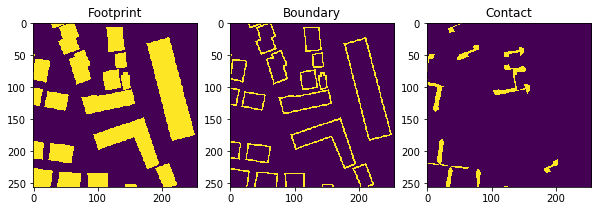

znz001val_19_319373_270508.png
loss: 0.6343321800231934


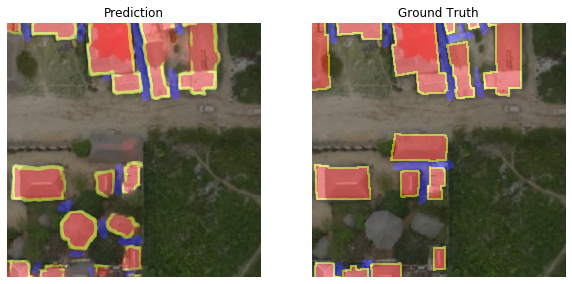

Predicted:


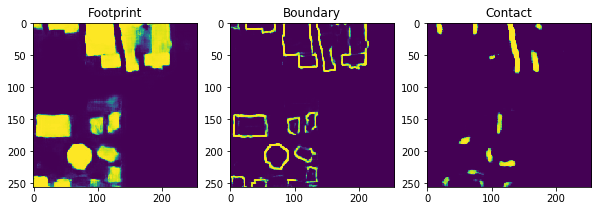

Actual:


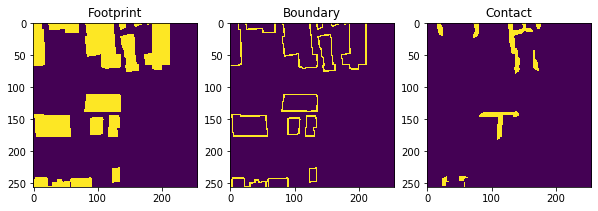

znz001val_19_319369_270497.png
loss: 0.5218732357025146


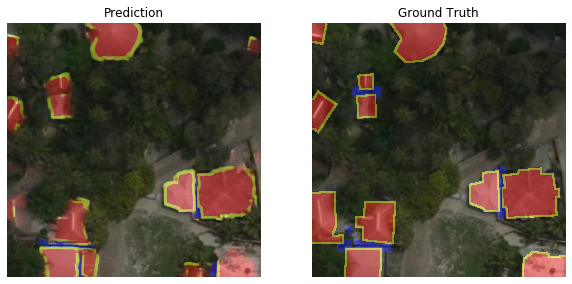

Predicted:


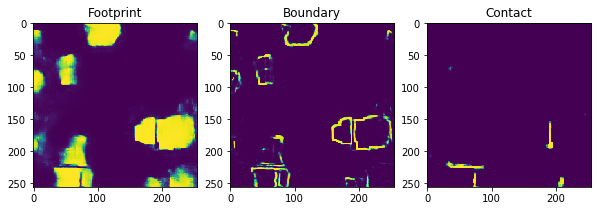

Actual:


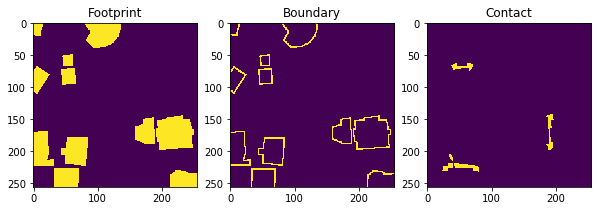

znz001val_19_319366_270508.png
loss: 0.5207541584968567


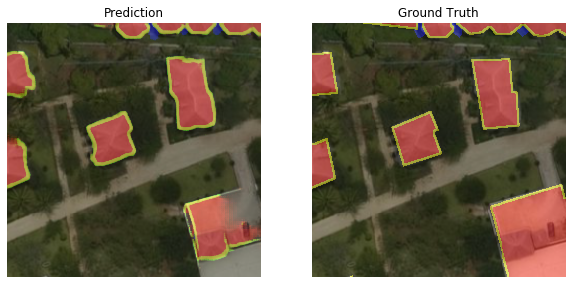

Predicted:


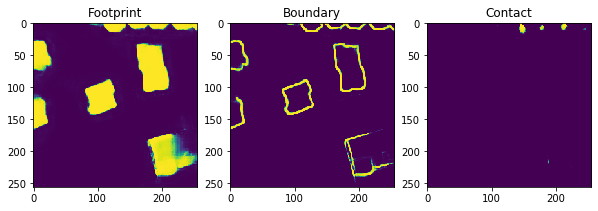

Actual:


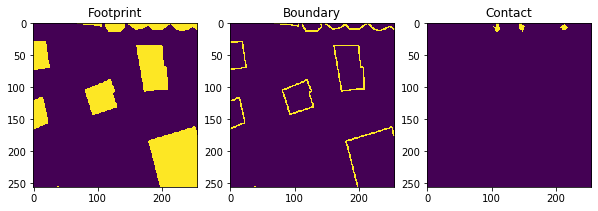

znz001val_19_319375_270516.png
loss: 0.5177489519119263


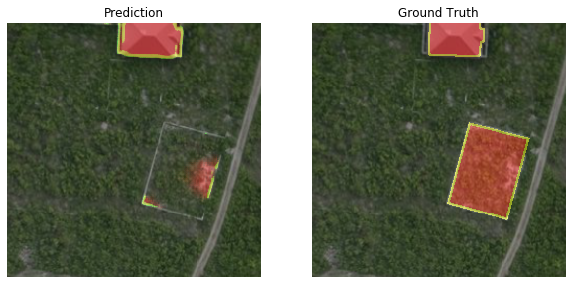

Predicted:


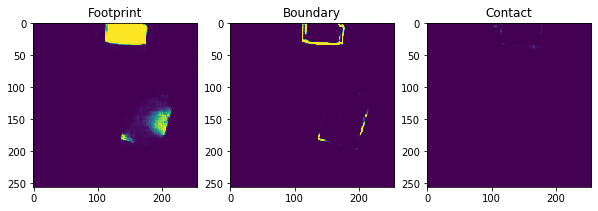

Actual:


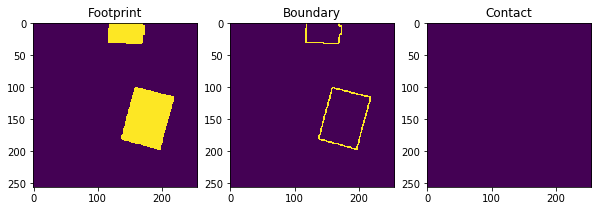

znz001val_19_319375_270514.png
loss: 0.5062533020973206


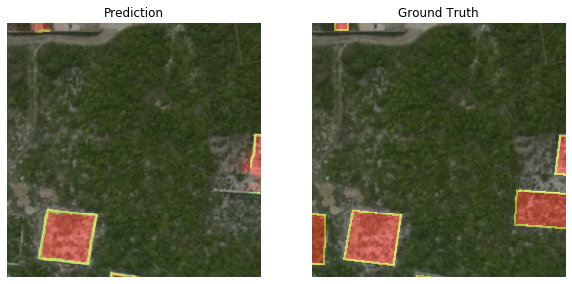

Predicted:


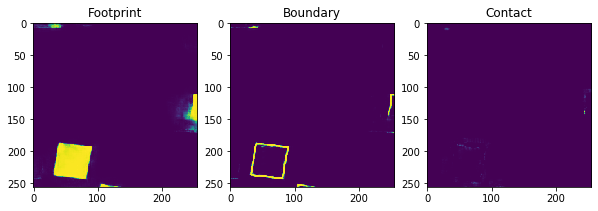

Actual:


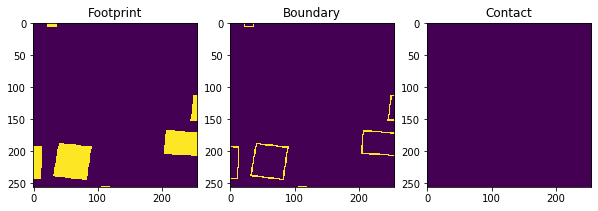

znz001val_19_319376_270521.png
loss: 0.4579203426837921


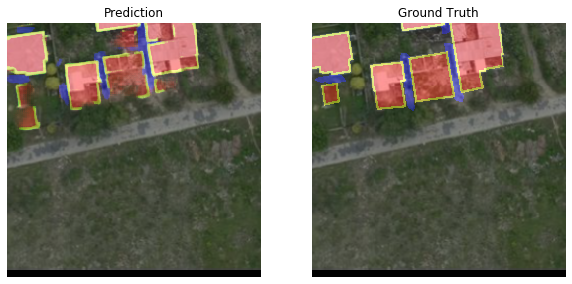

Predicted:


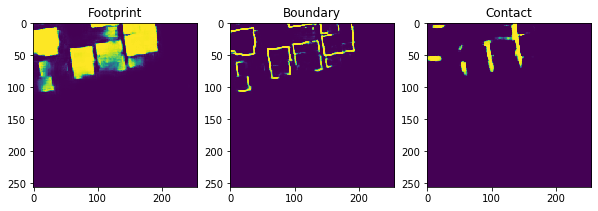

Actual:


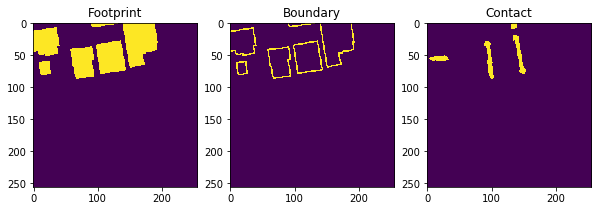

znz001val_19_319374_270521.png
loss: 0.4440661072731018


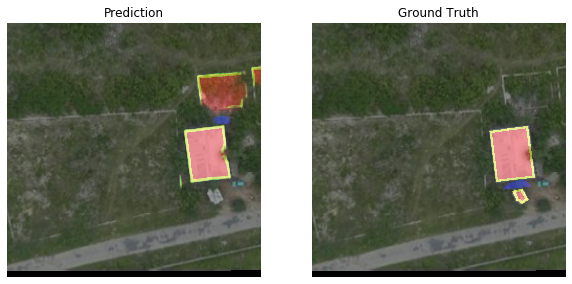

Predicted:


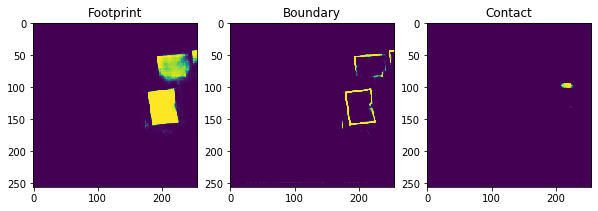

Actual:


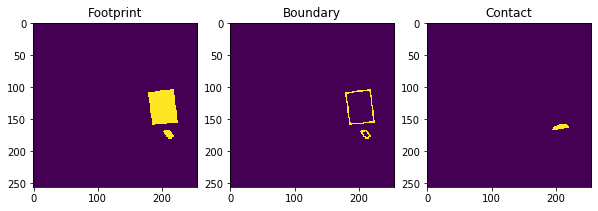

znz001val_19_319368_270509.png
loss: 0.43875807523727417


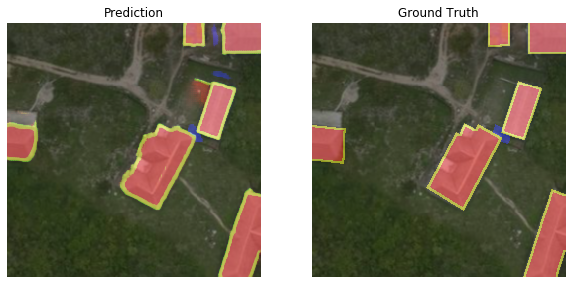

Predicted:


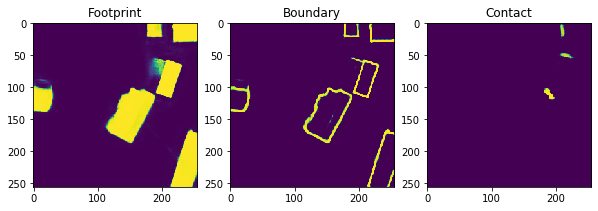

Actual:


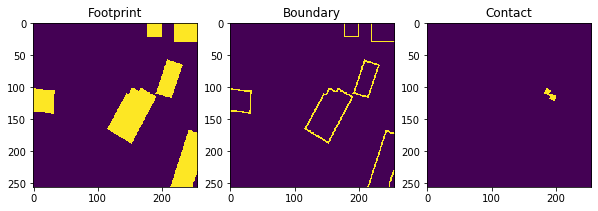

znz001val_19_319368_270510.png
loss: 0.4306926727294922


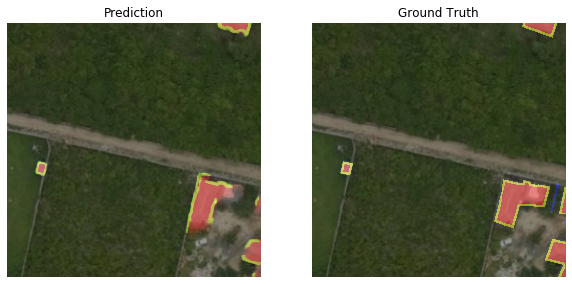

Predicted:


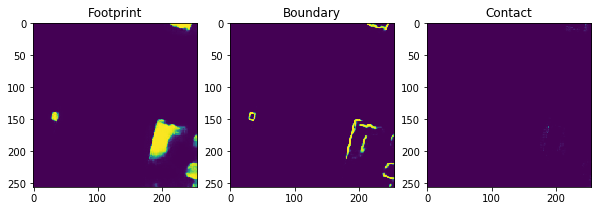

Actual:


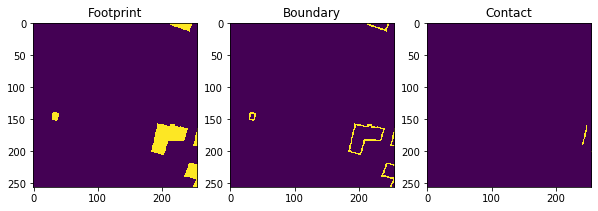

In [0]:
# look at predictions vs actual by channel sorted by highest image-wise loss first

for i in sorted_idx[:10]:

    print(f'{data.valid_ds.items[i].name}')
    print(f'loss: {losses_reshaped[i].mean()}')
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
    
    data.valid_ds.x[i].show(ax=ax1)
    ax1.set_title('Prediction')
    ax1.imshow(image2np(outputs[i].sigmoid()), alpha=0.4)
    
    ax2.set_title('Ground Truth')
    data.valid_ds.x[i].show(ax=ax2)
    ax2.imshow(image2np(labels[i])*255, alpha=0.4)
    plt.show()
    
    print('Predicted:')
    show_3ch(outputs[i].sigmoid())
    print('Actual:')
    show_3ch(labels[i])

In [0]:
learn.load('znz001trn-focaldice-stage2-best')
learn.model.train()
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.31E-07
Min loss divided by 10: 1.10E-07


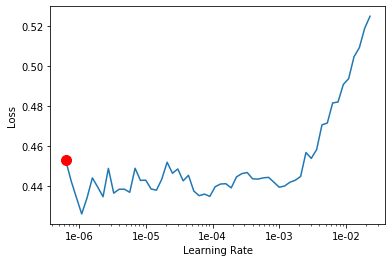

In [0]:
learn.recorder.plot(suggestion=True)

In [0]:
learn.fit_one_cycle(5, max_lr=slice(3e-6,3e-4), 
                    callbacks=[
                        SaveModelCallback(learn,
                                           monitor='dice_multich',
                                           mode='max',
                                           name='znz001trn-focaldice-unfrozen-best')
                    ]
                   )

Better model found at epoch 0 with dice_multich value: 0.8538597822189331.
Better model found at epoch 1 with dice_multich value: 0.8579529523849487.
Better model found at epoch 3 with dice_multich value: 0.8594419956207275.
Better model found at epoch 4 with dice_multich value: 0.8602766990661621.


In [0]:
learn.model.eval()
outputs,labels,losses = learn.get_preds(ds_type=DatasetType.Valid,n_batch=6,with_loss=True)
losses_reshaped = torch.mean(losses.view(outputs.shape[0],-1), dim=1)
sorted_idx = torch.argsort(losses_reshaped,descending=True)

znz001val_19_319367_270502.png
loss: 0.7875064611434937


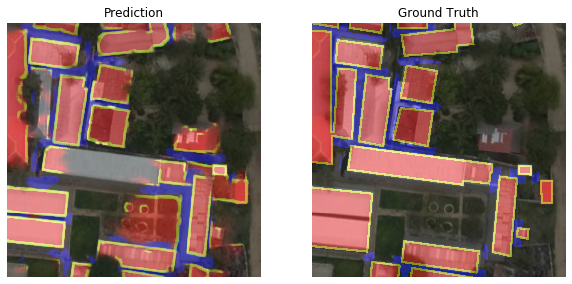

Predicted:


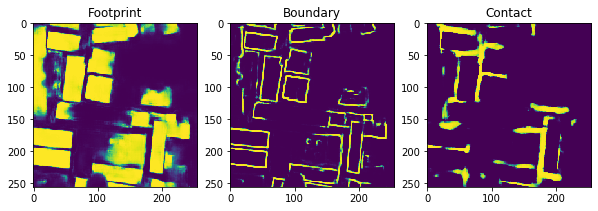

Actual:


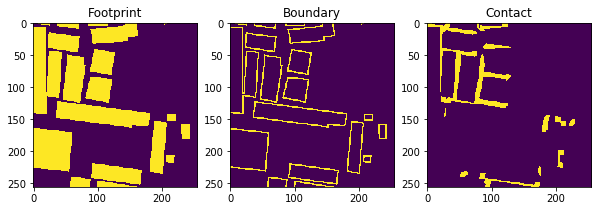

znz001val_19_319367_270501.png
loss: 0.662211000919342


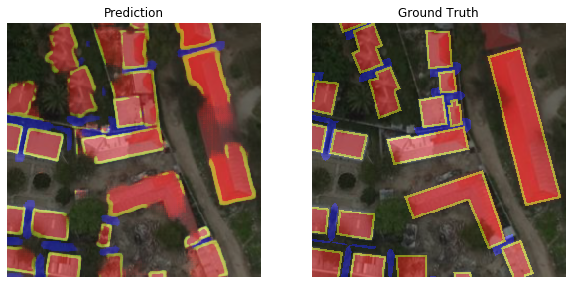

Predicted:


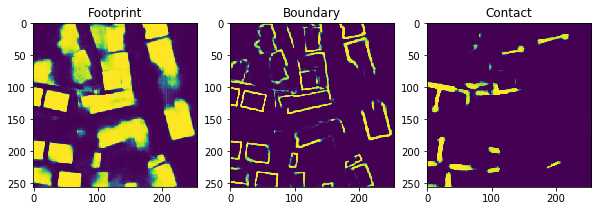

Actual:


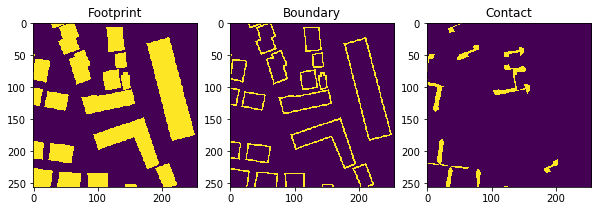

znz001val_19_319373_270508.png
loss: 0.5917503833770752


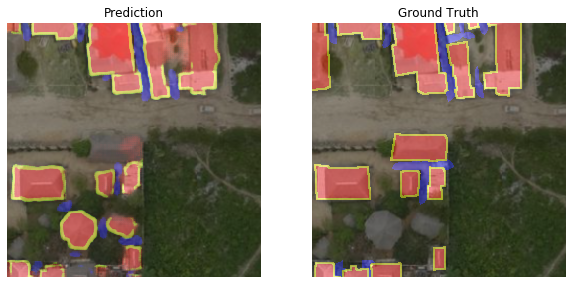

Predicted:


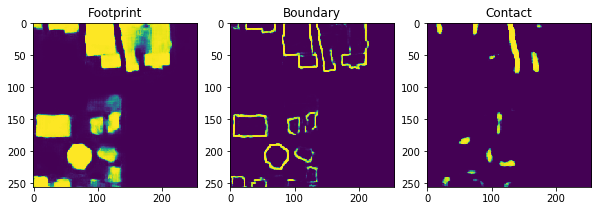

Actual:


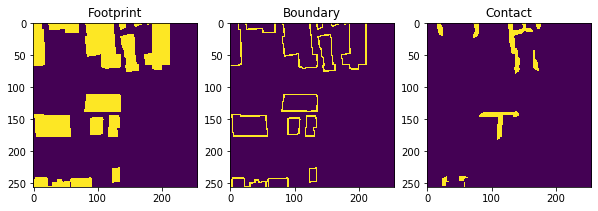

znz001val_19_319370_270500.png
loss: 0.5855281949043274


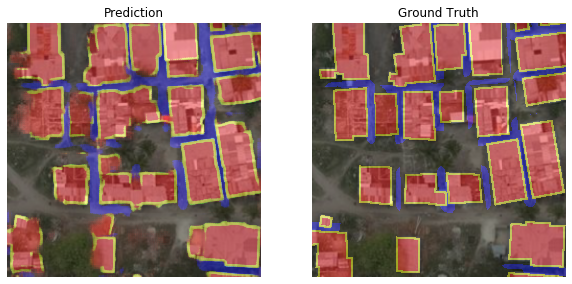

Predicted:


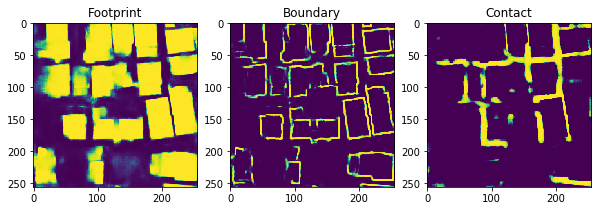

Actual:


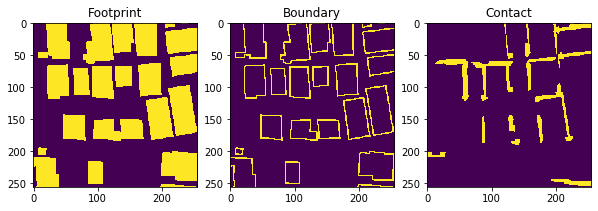

znz001val_19_319375_270516.png
loss: 0.5662961602210999


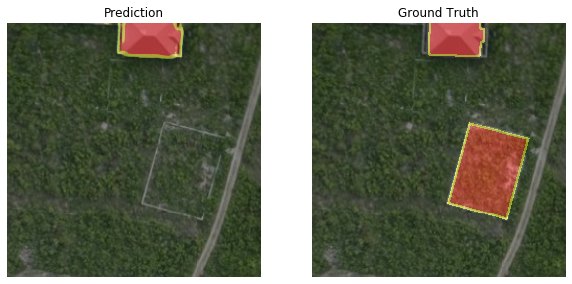

Predicted:


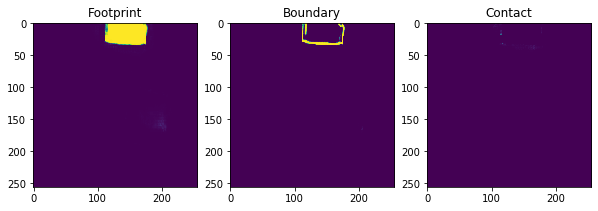

Actual:


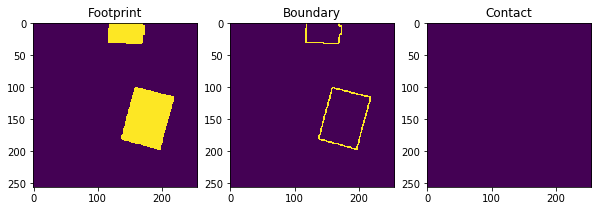

znz001val_19_319377_270511.png
loss: 0.539018988609314


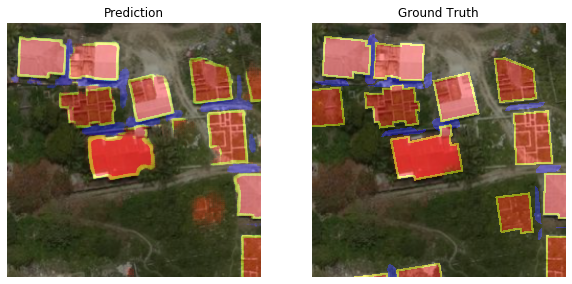

Predicted:


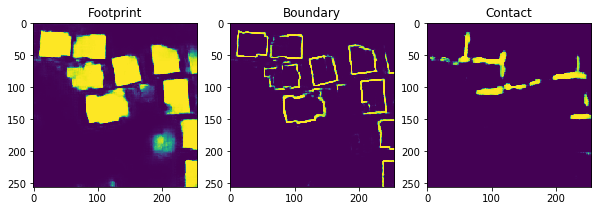

Actual:


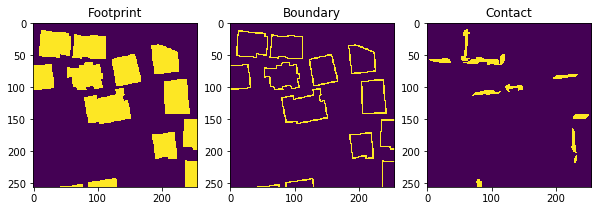

znz001val_19_319374_270503.png
loss: 0.5379717350006104


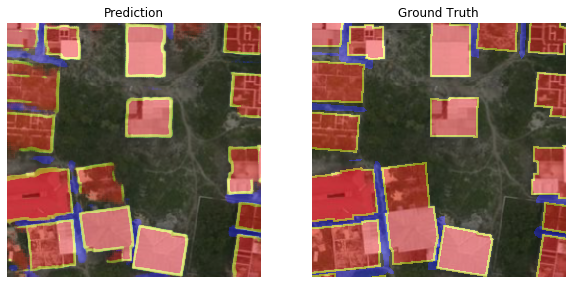

Predicted:


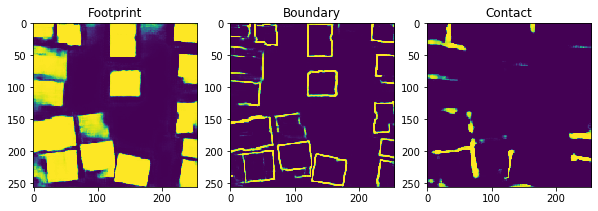

Actual:


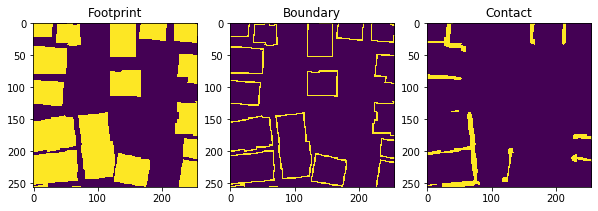

znz001val_19_319368_270502.png
loss: 0.5319989323616028


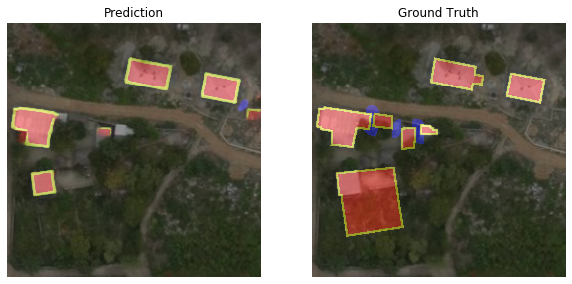

Predicted:


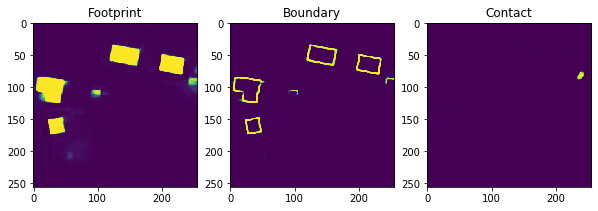

Actual:


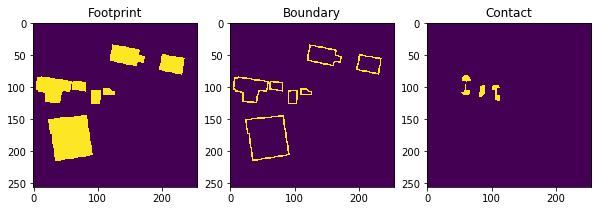

znz001val_19_319368_270497.png
loss: 0.5318840146064758


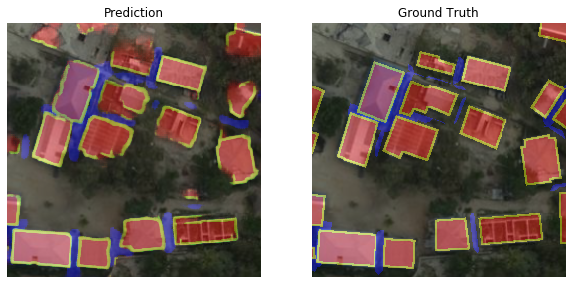

Predicted:


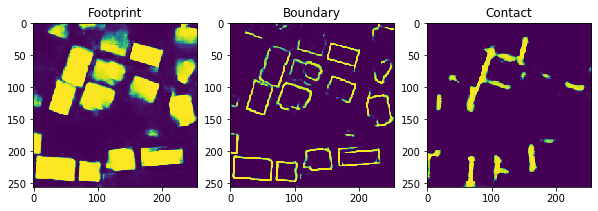

Actual:


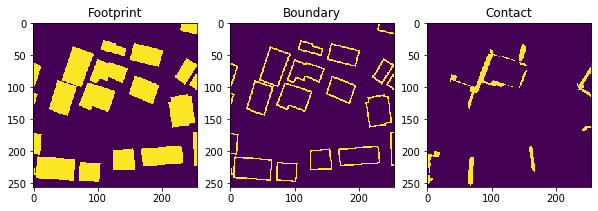

znz001val_19_319369_270497.png
loss: 0.49632540345191956


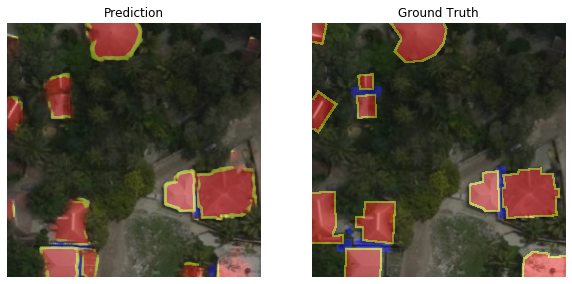

Predicted:


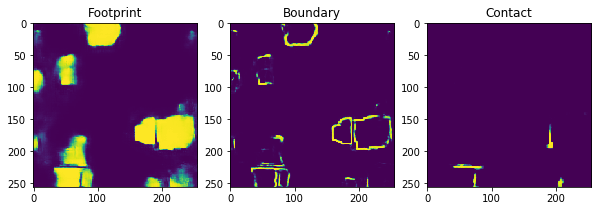

Actual:


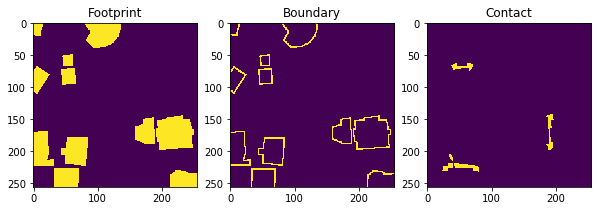

In [0]:
# look at predictions vs actual by channel sorted by highest image-wise loss first

for i in sorted_idx[:10]:

    print(f'{data.valid_ds.items[i].name}')
    print(f'loss: {losses_reshaped[i].mean()}')
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
    
    data.valid_ds.x[i].show(ax=ax1)
    ax1.set_title('Prediction')
    ax1.imshow(image2np(outputs[i].sigmoid()), alpha=0.4)
    
    ax2.set_title('Ground Truth')
    data.valid_ds.x[i].show(ax=ax2)
    ax2.imshow(image2np(labels[i])*255, alpha=0.4)
    plt.show()
    
    print('Predicted:')
    show_3ch(outputs[i].sigmoid())
    print('Actual:')
    show_3ch(labels[i])

In [0]:
# pickling with custom classes like MultiChComboLoss is a bit tricky 
learn.export('../../models/znz001trn-focaldice.pkl')

In [0]:
#
!curl https://course.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   322  100   322    0     0    849      0 --:--:-- --:--:-- --:--:--   856
Updating fastai...
Done.
